In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
np.random.seed(42) # 재현성을 위해 시드 고정
num_students = 100

# '공부한 시간' (0~10시간 사이의 랜덤 값)
study_hours = np.random.rand(num_students) * 10

# '시험 점수' (공부 시간에 비례 + 약간의 노이즈)
# (기본 50점 + 시간당 5점 + 랜덤 노이즈)
noise = np.random.randn(num_students) * 8 # 노이즈(운)
test_score = 50 + (study_hours * 5) + noise

# 점수가 0~100점을 벗어나지 않도록 조정
test_score = np.clip(test_score, 0, 100)

print("--- 1. 가상의 '공부 시간-시험 점수' 데이터 생성 완료 ---")


--- 1. 가상의 '공부 시간-시험 점수' 데이터 생성 완료 ---



--- 2. 산점도 생성 완료 ---


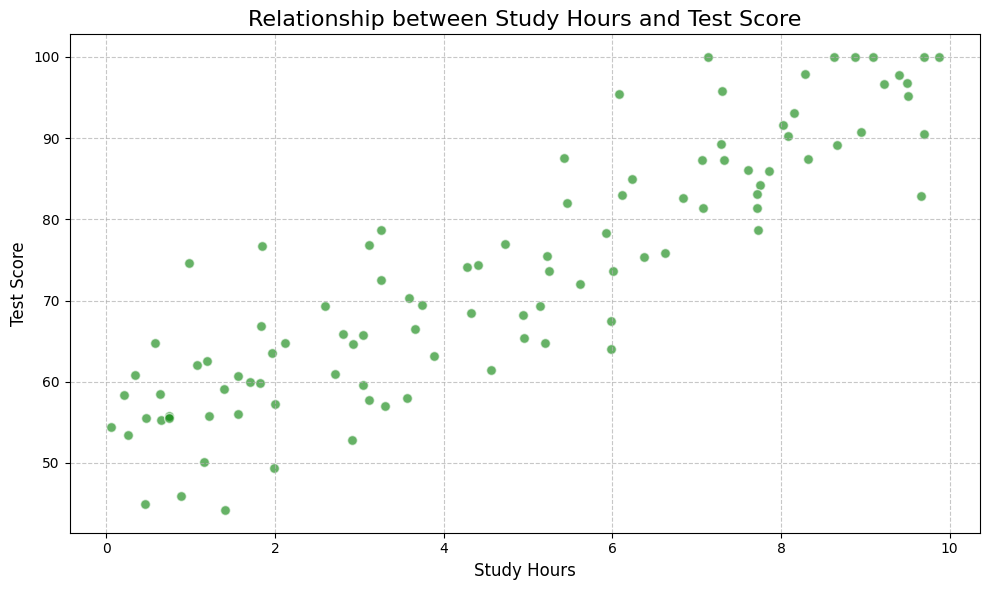

In [4]:

plt.figure(figsize=(10, 6)) # 가로 10, 세로 6인치

# 2-1. 산점도 생성 (핵심!)
# plt.scatter(x축_데이터, y축_데이터)
plt.scatter(study_hours, test_score,
            alpha=0.6,       # 점 투명도 (겹치는 부분 확인)
            color='green',     # 점 색상
            edgecolors='w',  # 점 테두리 색상 (흰색)
            s=50             # 점 크기
)

# --- 3. 그래프 꾸미기 ---
plt.title('Relationship between Study Hours and Test Score', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Test Score', fontsize=12)

# 그리드(격자) 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 레이블이 그림 밖으로 잘려나가지 않도록 설정
plt.tight_layout()

# --- 4. 그래프 표시 ---
print("\n--- 2. 산점도 생성 완료 ---")
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Y축 포맷팅을 위해
import os

In [5]:
file_name = '100 Sales Records.csv' # 업로드한 파일 이름

df = pd.read_csv(file_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:

# --- 2. 산점도에 사용할 컬럼 정의 ---
x_col = 'Units Sold'
y_col = 'Total Revenue'

# 2-1. (데이터 정제) 두 컬럼이 숫자인지 확인
df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
df[y_col] = pd.to_numeric(df[y_col], errors='coerce')

# 2-2. 유효한 데이터만 남기기
df = df.dropna(subset=[x_col, y_col])

--- 2. 'Units Sold'와 'Total Revenue' 데이터로 산점도 생성 ---

--- 3. 산점도 생성 완료 ---


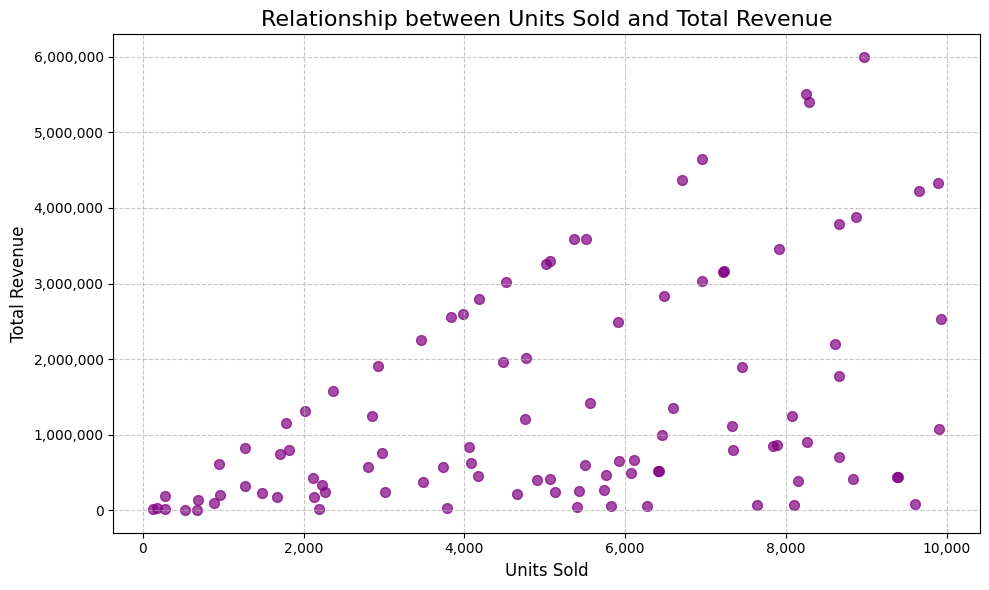

In [12]:


print(f"--- 2. '{x_col}'와 '{y_col}' 데이터로 산점도 생성 ---")

# --- 3. Matplotlib으로 산점도(Scatter Plot) 시각화 ---
plt.figure(figsize=(10, 6))

# 3-1. 산점도 생성 (핵심!)
# plt.scatter(x축_데이터, y축_데이터)
plt.scatter(df[x_col], df[y_col],
            alpha=0.7,       # 점 투명도
            color='purple',    # 점 색상
            s=50             # 점 크기
)

# --- 4. 그래프 꾸미기 ---
plt.title(f'Relationship between {x_col} and {y_col}', fontsize=16)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)

# Y축 포맷팅 (쉼표 추가)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# 그리드(격자) 추가
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 5. 그래프 표시 ---
print("\n--- 3. 산점도 생성 완료 ---")
plt.show()